# Japan Trade Statistics
In this notebook, I will focus on the exploration of data concerning Japan trade.
I will compare the trend of trade volume in years and the difference among countries.

The data comes from https://www.kaggle.com/zanjibar/japan-trade-statistics

## Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
import sys

## Data

What data I have

In [2]:
sorted(os.listdir("data/"))

['country_eng.csv',
 'custom.csv',
 'hs2_eng.csv',
 'hs4_eng.csv',
 'hs6_eng.csv',
 'hs9_eng.csv',
 'year_1988_2015.csv',
 'ym_custom_2016.csv',
 'ym_custom_latest.csv']

Some code book

country_eng.csv

In [3]:
country = pd.read_csv("data/country_eng.csv")

In [4]:
country.head(2)

,Country,Country_name,Area
0,103,Republic_of_Korea,Asia
1,104,North_Korea,Asia


It is dictionary to map the country code to the English name and area

hs2_eng.csv

In [5]:
hs2_eng = pd.read_csv("data/hs2_eng.csv")

In [6]:
hs2_eng.tail()

,hs2,hs2_name
92,93,Arms and ammunition; parts and accessories the...
93,94,Furniture; bedding mattresses mattress suppo...
94,95,Toys games and sports requisites; parts and a...
95,96,Miscellaneous manufactured articles.
96,97,Works of art collectors' pieces and antiques.


01-05  Animal & Animal Products<br>
06-15  Vegetable Products<br>
16-24  Foodstuffs<br>
25-27  Mineral Products<br>
28-38  Chemicals & Allied Industries<br>
39-40  Plastics / Rubbers<br>
41-43  Raw Hides, Skins, Leather, & Furs<br>
44-49  Wood & Wood Products<br>
50-63  Textiles<br>
64-67  Footwear / Headgear<br>
68-71  Stone / Glass<br>
72-83  Metals<br>
84-85  Machinery / Electrical<br>
86-89  Transportation<br>
90-97  Miscellaneous<br>

http://www.foreign-trade.com/reference/hscode.htm

hs4_eng.csv

In [7]:
hs4_eng = pd.read_csv("data/hs4_eng.csv")

In [8]:
hs4_eng.tail(5)

,hs4,hs4_name
1219,9702,Original_engravings__prints_and_lithographs
1220,9703,Original_sculptures_and_statuary__in_any_material
1221,9704,Postage_or_revenue_stamps__stamp-postmarks__fi...
1222,9705,Collections_and_collectors'_pieces_of_zoologic...
1223,9706,Antiques_of_an_age_exceeding_one_hundred_years


the hs4_eng is a sub category of hs2<br>
I will stick to hs2_eng first

### Some real trade data

I will first focus on year_1988_2015.csv

In [9]:
year_1988_2015 = pd.read_csv("data/year_1988_2015.csv")

Size, shape, type, features, missing...

In [10]:
year_1988_2015.head()

,exp_imp,Year,Country,Unit1,Unit2,QY1,QY2,VY,hs2,hs4,hs6,hs9
0,1,1988,210,NaN,NO,0,3,25706,1,101,10111,10111000
1,1,1988,104,NaN,NO,0,4,5600,1,101,10119,10119000
2,1,1988,106,NaN,NO,0,6,9600,1,101,10119,10119000
3,1,1988,105,NaN,NO,0,1,1230,1,102,10290,10290000
4,1,1988,304,NaN,NO,0,2,3500,1,102,10290,10290000


In [11]:
year_1988_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6601602 entries, 0 to 6601601
Data columns (total 12 columns):
exp_imp    int64
Year       int64
Country    int64
Unit1      object
Unit2      object
QY1        int64
QY2        int64
VY         int64
hs2        int64
hs4        int64
hs6        int64
hs9        int64
dtypes: int64(10), object(2)
memory usage: 604.4+ MB


Which are useful?

Year<br>
Country<br>
VY is a value of goods which was traded<br>
hs2 is a top category which was categorized hierarchically by HS code.<br>
hs4 is a second categorization as well as hs2<br>
hs6 is a third one<br>

Filter features 

In [12]:
columns = ["Year", "Country", "VY", "hs2", "hs4"]
year_data = year_1988_2015[columns]

In [13]:
year_data.head(2)

,Year,Country,VY,hs2,hs4
0,1988,210,25706,1,101
1,1988,104,5600,1,101


Then we can start to explore based on the year_data

## Exploration

### Quetions

1.Trend of total # of trade <br>
2.Does Japan trade more with Asia or other continents<br>
3.What is the dominant country in the dominant area<br>
4.What is the structure of trading, which good dominate, is that changing?<br>
5.Difference when trade with different continents<br>

I will try to visualize and answer the four questions above 

#### 1.Trend of total # of trade 

In [14]:
year_sum = year_data.groupby(["Year"])["VY"].sum()
year_sum = year_sum.reset_index()

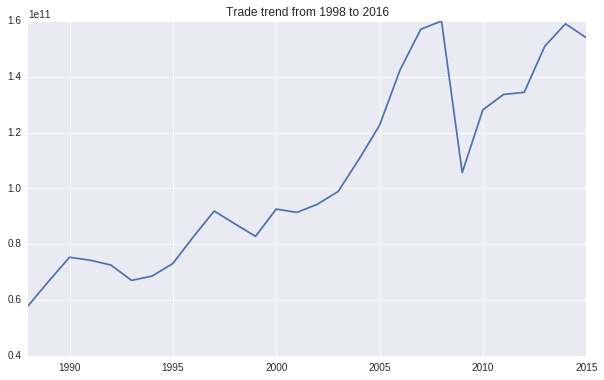

In [15]:
# Line plot
fig, ax = plt.subplots(figsize = [10,6])

ax.plot(year_sum["Year"], year_sum["VY"], zorder=10);
ax.grid(True, zorder=5)
plt.xlim([year_sum.ix[0,"Year"], year_sum.ix[year_sum.shape[0]-1,"Year"]]);
plt.title("Trade trend from 1998 to 2016");

From this graph, we see a upper trend of trade of Japan. However, an obvious downturn happens at 2008 because the worldwide financial crisis. Japan start to revive from the crisis quickly in about an year and spend about 5 years to reach the previous peak of trade value 

### 2.Does Japan trade more with Asia or other continents

Then, we start to have a look at the trading preference of Japan to different continents

We need to build a dictionary first to map the country to coninent

In [16]:
country.head(2)

,Country,Country_name,Area
0,103,Republic_of_Korea,Asia
1,104,North_Korea,Asia


In [17]:
# create country map
area_map = pd.Series(country["Area"]) 
area_map.index=country["Country"]

# create area data
year_data["Area"] = area_map[year_data["Country"]].tolist()
targetarea = [x not in ["Special_Area", "Integrated_Hozei_Ar_Special_Area"] for x in year_data["Area"]]
area_data = year_data.ix[targetarea,:] \
            .groupby(["Year", "Area"])["VY"].sum()
area_data = area_data.reset_index()

/home/peiran/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [18]:
# plot area comparisons
area_data.head(2)

,Year,Area,VY
0,1988,Africa,1327875423
1,1988,Asia,17326845717


General comparison

In [19]:
area_sum = area_data.groupby("Area")["VY"].sum().reset_index().sort_values(by="VY", ascending=True)

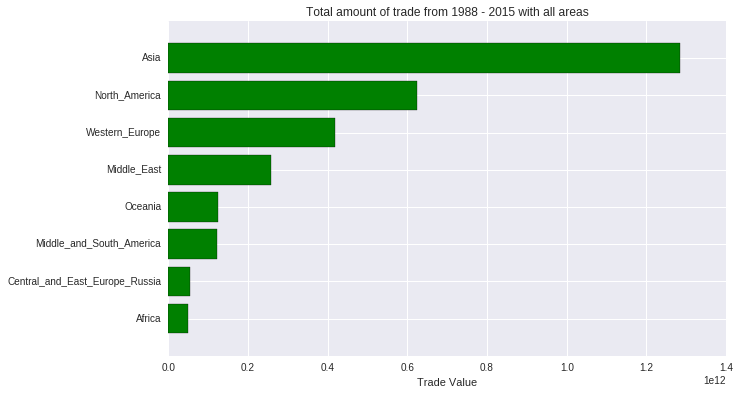

In [20]:
# barplot
fig, ax = plt.subplots(figsize = (10,6))
x_pos = np.arange(len(area_sum));
ax.barh(x_pos, area_sum["VY"], align='center',color='green');
ax.set_yticks(x_pos);
ax.set_yticklabels(area_sum["Area"]);
ax.set_xlabel("Trade Value");
ax.set_title("Total amount of trade from 1988 - 2015 with all areas");

We can see that the Asia is the most important trading partner of Japan over 1988 - 2015. North_Amarica and Western_Europe follows. However, did this trading preference change over the years? We have to look at the structure of each year.

In [21]:
areas = np.unique(area_data["Area"])

In [22]:
area_offset = {'Africa':-0.05, 'Asia':-0.05, 'Central_and_East_Europe_Russia':-0.05, 'Middle_East':-0.05,
       'Middle_and_South_America':-0.1, 'North_America':-0.05, 'Oceania':0,
       'Western_Europe':-0.05}

In [88]:
color_sequence = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c',
                  '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5',
                  '#8c564b', '#c49c94', '#e377c2', '#f7b6d2', '#7f7f7f',
                  '#c7c7c7', '#bcbd22', '#dbdb8d', '#17becf', '#9edae5']

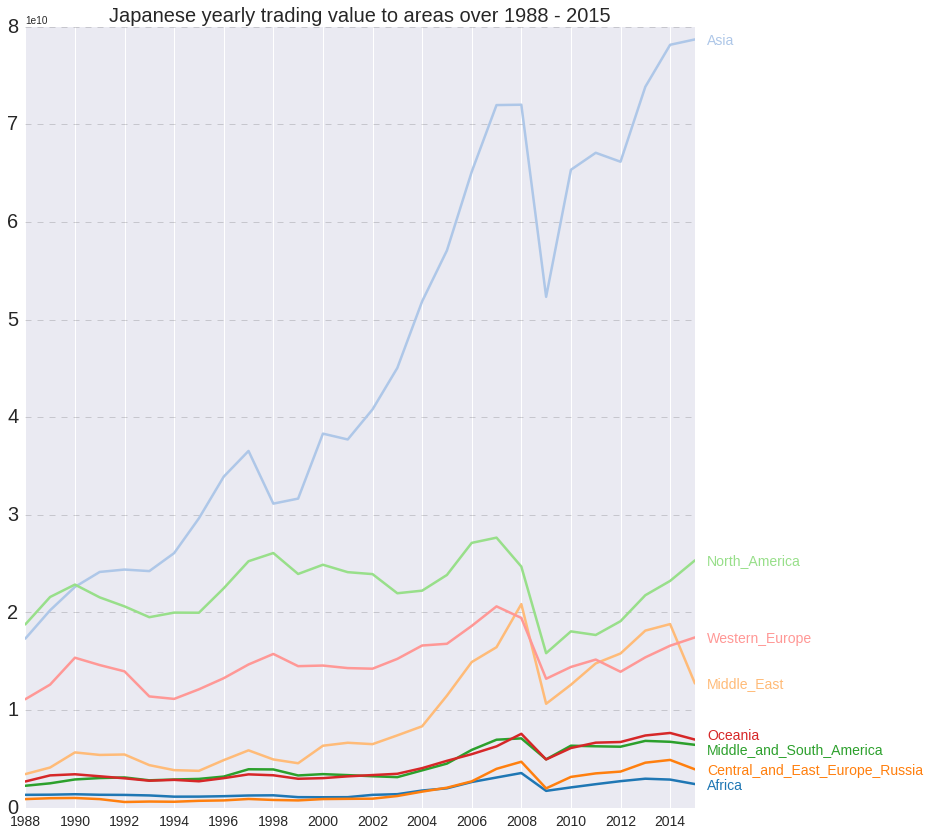

In [23]:
# These are the colors that will be used in the plot
fig, ax = plt.subplots(1, 1, figsize=(12, 14));
for rank, area in enumerate(areas):
    areaplot = area_data.ix[area_data.Area==area,:]
    plt.plot(areaplot.Year,
                    areaplot.VY,
                    lw=2.5,
                    color=color_sequence[rank])
    y_pos = areaplot["VY"].tail(1) + area_offset[area]*10**10
    plt.text(2015.5, y_pos, area, fontsize=14, color=color_sequence[rank])
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.tick_params(axis='y', labelsize=20)
plt.xlim([1988,2015]);
plt.xticks(range(1988, 2015, 2), fontsize=14);
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3);
plt.title("Japanese yearly trading value to areas over 1988 - 2015", size=20);
fig.savefig('jap_area_trade.png')

This graph shows that back to 1988, The North America is the biggest trading partner of Japan, Howver, after 1990,
Asia start to replace the position of North America and lead with a very hugh gap compared to other areas. <br>
A following question is: ***what is the driving force of the sharp increase since 1990?***<br>
We can draw a futher plot for the Asia from 1988 to 2014<br>
We will focus on the top 12 countries in Asia that influence Japan most

In [24]:
country_map = pd.Series(country["Country_name"]) 
country_map.index=country["Country"]

In [25]:
year_data["Country_eng"] = country_map[year_data["Country"]].tolist()

/home/peiran/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [26]:
# trading countries in Asia
np.unique(year_data.ix[year_data["Area"]=="Asia","Country_eng"])

array(['Afghanistan', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia',
       'Hong_Kong', 'India', 'Indonesia', 'Laos', 'Macao', 'Malaysia',
       'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'North_Korea',
       'Pakistan', "People's_Republic_of_China", 'Philippines',
       'Republic_of_Korea', 'Singapore', 'Sri_Lanka', 'Taiwan', 'Thailand',
       'Timor-Leste', 'Viet_Nam'], dtype=object)

In [27]:
# create area data
asia_data = year_data.ix[year_data["Area"]=="Asia",:] \
            .groupby(["Year", "Country_eng"])["VY"].sum().reset_index()

In [28]:
asia_country_sum = asia_data.groupby("Country_eng")["VY"].sum() \
                    .reset_index().sort_values(by="VY",ascending=False)

In [29]:
topcountry = asia_country_sum["Country_eng"][0:12]

In [30]:
topcountry.values

array(["People's_Republic_of_China", 'Republic_of_Korea', 'Taiwan',
       'Thailand', 'Hong_Kong', 'Indonesia', 'Malaysia', 'Singapore',
       'Philippines', 'Viet_Nam', 'India', 'Brunei'], dtype=object)

We can create a similar graph to the above one

In [31]:
countries = asia_data.Country_eng
country_offset = {"People's_Republic_of_China":0, 'Republic_of_Korea':0, 'Taiwan':0,
       'Thailand':0, 'Hong_Kong':0.035, 'Indonesia':0, 'Malaysia':0.02, 'Singapore':-0.005,
       'Philippines':-0.02, 'Viet_Nam':-0.05, 'India':-0.02, 'Brunei':0}

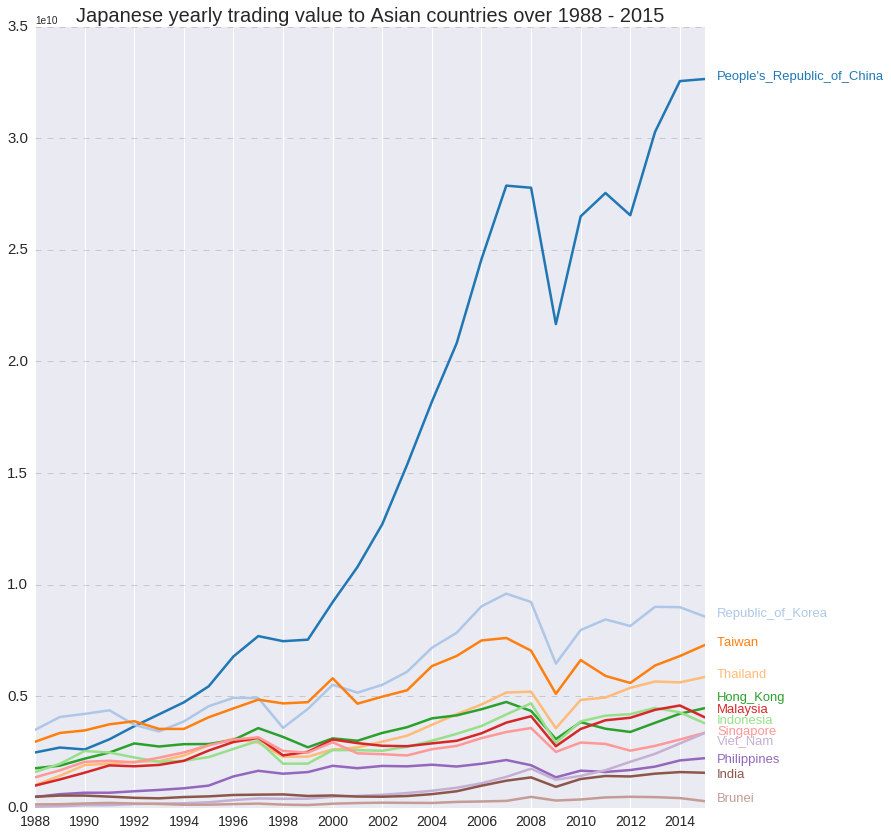

In [158]:
# These are the colors that will be used in the plot
fig, ax = plt.subplots(1, 1, figsize=(12, 14));
for rank, country in enumerate(topcountry):
    countryplot = asia_data.ix[asia_data.Country_eng==country,:]
    plt.plot(countryplot.Year,
                    countryplot.VY,
                    lw=2.5,
                    color=color_sequence[rank])
    y_pos = countryplot["VY"].tail(1) + country_offset[country]*10**10
    plt.text(2015.5, y_pos, country, fontsize=13, color=color_sequence[rank])
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.tick_params(axis='y', labelsize=15)
plt.xlim([1988,2015]);
plt.xticks(range(1988, 2015, 2), fontsize=14);
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3);
plt.title("Japanese yearly trading value to Asian countries over 1988 - 2015", size=20);
fig.savefig('jap_asia_trade.png') 

Clearly, the dominant driving force of the increase of Japanese trade to the Asian Area is its trade with China.

Another following question of this is that what kinds of products contirbute most to this trading change?

In [39]:
china_data = year_data.ix[year_data.Country_eng=="People's_Republic_of_China",:]

In [41]:
china_data.shape

(276480, 7)

We first have a look at the structure of commodities in the Japanese Trade and translate the hs2 code to the corresponding category of commodity

In [46]:
def rule(x):
    if x >= 1 and x <= 5:
        return "Animal & Animal Products"
    elif x >= 6 and x <= 15:
        return "Vegetable Products"
    elif x >= 16 and x <= 24:
        return "Foodstuffs"
    elif x >= 25 and x <= 27:
        return "Mineral Products"
    elif x >= 28 and x <= 38:
        return "Chemicals & Allied Industries"
    elif x >= 39 and x <= 40:
        return "Plastics / Rubbers"
    elif x >= 41 and x <= 43:
        return "Raw Hides, Skins, Leather, & Furs"
    elif x >= 44 and x <= 49:
        return "Wood & Wood Products"
    elif x >= 50 and x <= 63:
        return "Textiles"
    elif x >= 64 and x <= 67:
        return "Footwear / Headgear"
    elif x >= 68 and x <= 71:
        return "Stone / Glass"
    elif x >= 72 and x <= 83:
        return "Metals"
    elif x >= 84 and x <= 85:
        return "Machinery / Electrical"
    elif x >= 86 and x <= 89:
        return "Transportation"
    else:
        return "Miscellaneous"

In [48]:
# hs2 code translation
year_data["goods"] = year_data["hs2"].apply(rule)

/home/peiran/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Let's see the structure

In [82]:
goods_sum = year_data.groupby("goods")["VY"].sum().reset_index().sort_values(by="VY", ascending=False)
goods_sum["ratio"] = goods_sum["VY"]/goods_sum["VY"].sum()

In [86]:
# plotly pie plot
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

labels = goods_sum["goods"]
values = goods_sum["ratio"]*100

layout = go.Layout(
    title='Ratio of Commodities'
)

data = go.Pie(labels=labels, values=values)

fig = go.Figure(data=[data], layout=layout)
plot_url = plot(fig, filename='pieplot.html')

The top three kinds of trading Machienery / Ellectircal, Transporation and Mineral Products. For both import and export

Lets see the trade with China

In [84]:
china_data = year_data.ix[year_data.Country_eng=="People's_Republic_of_China",:]
china_sum = china_data.groupby("goods")["VY"].sum().reset_index().sort_values(by="VY", ascending=False)
china_sum["ratio"] = china_sum["VY"]/china_sum["VY"].sum()

In [87]:
# plotly pie plot
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

labels = china_sum["goods"]
values = china_sum["ratio"]*100

layout = go.Layout(
    title='Ratio of Commodities with China'
)

data = go.Pie(labels=labels, values=values)

fig = go.Figure(data=[data], layout=layout)
plot_url = plot(fig, filename='pieplot.html')

We can see that the Michinery / Electrical is the dominant part in the trading between China and Japan, followed by Textiles and Miscellaneous. We do not see the Transportation and Mineral Products appearing at the top.

How does the structure changed from 1988 to 2015?

In [97]:
china_year= china_data.groupby(["Year","goods"])["VY"].sum().reset_index()
goods_list = np.unique(china_year["goods"])

In [98]:
goods_list

array(['Animal & Animal Products', 'Chemicals & Allied Industries',
       'Foodstuffs', 'Footwear / Headgear', 'Machinery / Electrical',
       'Metals', 'Mineral Products', 'Miscellaneous', 'Plastics / Rubbers',
       'Raw Hides, Skins, Leather, & Furs', 'Stone / Glass', 'Textiles',
       'Transportation', 'Vegetable Products', 'Wood & Wood Products'], dtype=object)

In [155]:
goods_offset = {'Animal & Animal Products':-0.08, 'Chemicals & Allied Industries':-0.01,
       'Foodstuffs':0.03, 'Footwear / Headgear':-0.005, 'Machinery / Electrical':0,
       'Metals':0.01, 'Mineral Products':-0.03, 'Miscellaneous':0, 'Plastics / Rubbers':-0.005,
       'Raw Hides, Skins, Leather, & Furs':-0.075, 'Stone / Glass':0.013, 'Textiles':0,
       'Transportation':0.01, 'Vegetable Products':-0.05, 'Wood & Wood Products':-0.03}

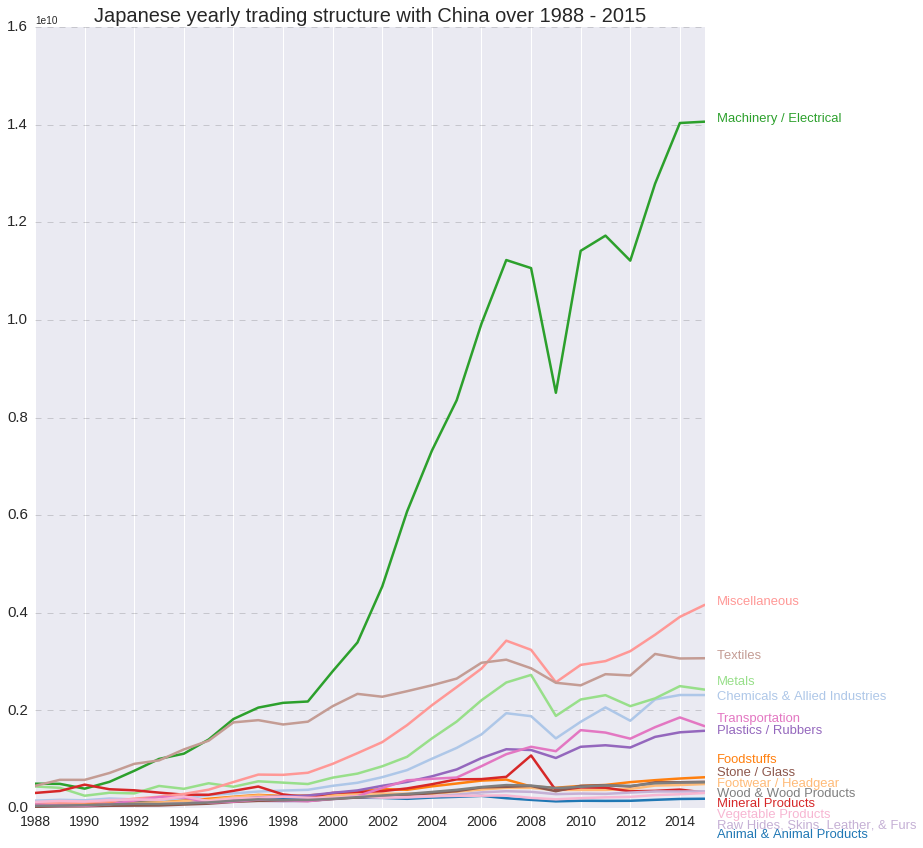

In [157]:
# These are the colors that will be used in the plot
fig, ax = plt.subplots(1, 1, figsize=(12, 14));
for rank, good in enumerate(goods_list):
    goodsplot = china_year.ix[china_year.goods==good,:]
    plt.plot(goodsplot.Year,
                    goodsplot.VY,
                    lw=2.5,
                    color=color_sequence[rank])
    y_pos = goodsplot["VY"].tail(1) + goods_offset[good]*10**10
    plt.text(2015.5, y_pos, good, fontsize=13, color=color_sequence[rank])
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.tick_params(axis='y', labelsize=15)
plt.xlim([1988,2015]);
plt.xticks(range(1988, 2015, 2), fontsize=14);
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3);
plt.title("Japanese yearly trading structure with China over 1988 - 2015", size=20);
fig.savefig('jap_china_trade.png') 

Since 1990, we start to see the increase of the total amount of trade between China and Japan and the driving force behind this is the increase of Machinary / Electrical. Between 2000 and 2008, we witness the golden period where the speed of increase is extremely faster than before. <br>
We also notice a sudden increase of Mineral Products at 2008. Interesting.<br>
The Miscellaneous and Textiles also remind me of the "Made in China" phenomenon after 2000